# QRSM Convergence Study

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import QuadraticAnalysisToolkit as QAT
plt.rcParams['figure.figsize'] = (10, 6)

/home/eugene/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:493: UserWarning: matplotlibrc text.usetex can not be used with *Agg backend unless dvipng-1.5 or later is installed on your system
  warnings.warn('matplotlibrc text.usetex can not be used with *Agg '


In [2]:
# Info to set up analysis
lo = [0.01, 0.3]
hi = [0.1, 0.9]
ndim = 2
csvfile = 'output2.csv'
csvdelimiter = ','
skipheader = 1
nensemble = 6

In [3]:
# Open the csv file in a Grid object
fullgrid = QAT.Grid()
fullgrid.initFromCSV(csvfile, delimiter=csvdelimiter, skip_header=skipheader)

## Convergence With No Repeated Samples

In [4]:
quadratic_analyses = []

pointlist = fullgrid.points[:]
success = True

# Select the first 6, then 12, etc points from the full grid
# and do separate quadratic analyses on them. Warn on error.
for i in [6, 12, 24, 48, 72]:
    ipts  = [pointlist.pop(0) for j in range(i)]
    igrid = QAT.Grid(ipts)
    iqa   = QAT.QuadraticAnalysis(igrid, lo, hi)
    success = success and iqa.eopt.success
    if not success:
        write('ERROR: subsampling analyis failed with {} points!'.format(i))
        break
    else:
        quadratic_analyses.append(iqa)

/home/eugene/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/eugene/codes/astro/StarSTRUQ/UQ-mesa/QuadraticAnalysisToolkit.py:348: RuntimeWarning: divide by zero encountered in true_divide
  f += hp**2 / (4. * (mup + x)**2)
/home/eugene/codes/astro/StarSTRUQ/UQ-mesa/QuadraticAnalysisToolkit.py:348: RuntimeWarning: divide by zero encountered in double_scalars
  f += hp**2 / (4. * (mup + x)**2)


In [5]:
# Collect each inner and outer max/mins
num_points = []
inner_maxs = []
inner_mins = []
outer_maxs = []
outer_mins = []
for qa in quadratic_analyses:
    num_points.append(len(qa.grid.points))
    inner_maxs.append(qa.eopt.inner_max)
    inner_mins.append(qa.eopt.inner_min)
    outer_maxs.append(qa.eopt.outer_max)
    outer_mins.append(qa.eopt.outer_min)

/home/eugene/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


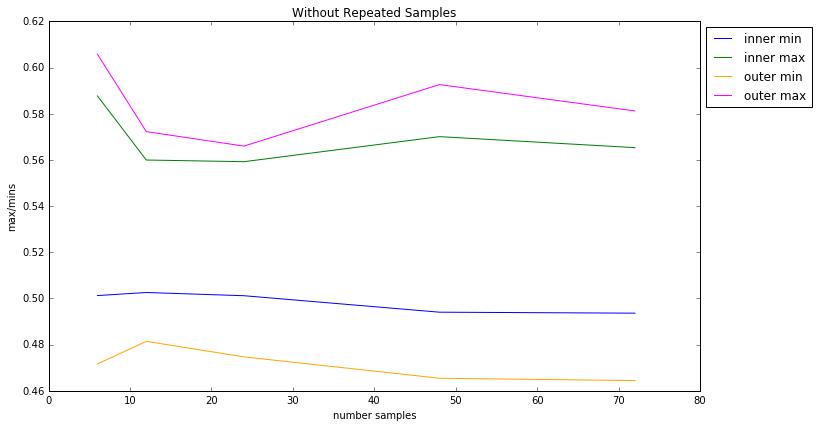

In [6]:
fig, ax = plt.subplots()
ax.plot(num_points, inner_mins, color='blue', label='inner min')
ax.plot(num_points, inner_maxs, color='green', label='inner max')
ax.plot(num_points, outer_mins, color='orange', label='outer min')
ax.plot(num_points, outer_maxs, color='magenta', label='outer max')
ax.set_xlabel('number samples')
ax.set_ylabel('max/mins')
plt.title('Without Repeated Samples')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.savefig('convergence_without_repeats.png', dpi=300)

## "Convergence" With Repeated Samples

In [7]:
quadratic_analyses = []

pointlist = fullgrid.points[:]
success = True

# Select the first 6, then 7, 8, ... etc points from the full grid
# and do separate quadratic analyses on them. Warn on error.
for i in range(6, len(pointlist)):
    ipts  = pointlist[:i]
    igrid = QAT.Grid(ipts)
    iqa   = QAT.QuadraticAnalysis(igrid, lo, hi)
    success = success and iqa.eopt.success
    if not success:
        write('ERROR: subsampling analyis failed with {} points!'.format(i))
        break
    else:
        quadratic_analyses.append(iqa)

/home/eugene/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/eugene/codes/astro/StarSTRUQ/UQ-mesa/QuadraticAnalysisToolkit.py:348: RuntimeWarning: divide by zero encountered in true_divide
  f += hp**2 / (4. * (mup + x)**2)
/home/eugene/codes/astro/StarSTRUQ/UQ-mesa/QuadraticAnalysisToolkit.py:348: RuntimeWarning: divide by zero encountered in double_scalars
  f += hp**2 / (4. * (mup + x)**2)


In [8]:
# Collect each inner and outer max/mins
num_points = []
inner_maxs = []
inner_mins = []
outer_maxs = []
outer_mins = []
for qa in quadratic_analyses:
    num_points.append(len(qa.grid.points))
    inner_maxs.append(qa.eopt.inner_max)
    inner_mins.append(qa.eopt.inner_min)
    outer_maxs.append(qa.eopt.outer_max)
    outer_mins.append(qa.eopt.outer_min)

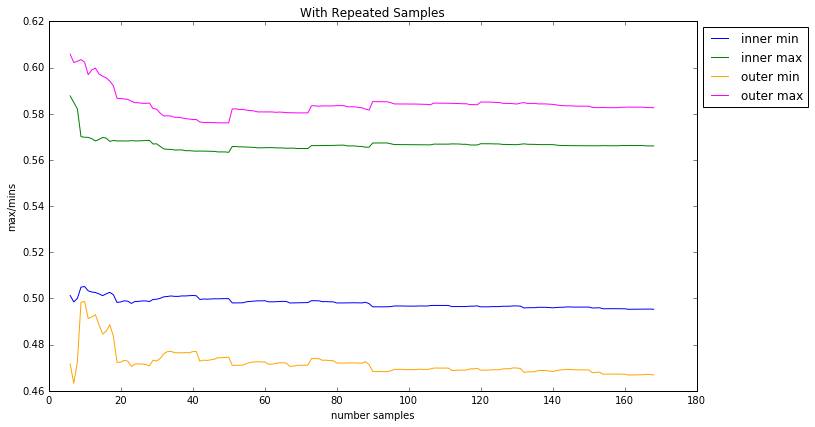

In [9]:
fig, ax = plt.subplots()
ax.plot(num_points, inner_mins, color='blue', label='inner min')
ax.plot(num_points, inner_maxs, color='green', label='inner max')
ax.plot(num_points, outer_mins, color='orange', label='outer min')
ax.plot(num_points, outer_maxs, color='magenta', label='outer max')
ax.set_xlabel('number samples')
ax.set_ylabel('max/mins')
plt.title('With Repeated Samples')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.savefig('convergence_with_repeats.png', dpi=300)